In [1]:
import pandas as pd

In [2]:
file_path = r'C:/Users/GPGYU/Documents/Yeast/CountMatrixRNA-seq.csv'
df_yeast_expr = pd.read_csv(file_path, sep=';')

In [3]:
df_yeast_expr.head()

Gene    wt.30.0.1    wt.30.0.2    wt.30.0.3    wt.30.0.4   wt.39.20.1  \
0  YIL100W     7.718619     2.238350     3.665188     6.469028    11.268693   
1  YDR130C   324.292154   347.110741   308.107045   279.146220   303.945021   
2  YDR473C   301.492399   166.840794   203.243715   210.549227   222.860118   
3  YKL175W  2768.826944  2765.729224  2736.768207  2896.069635  2833.228441   
4  YDR239C  1151.506271  1201.824079  1189.678888  1100.412760  1189.633468   

    wt.39.20.2   wt.39.20.3   wt.39.20.4  wt.39.120.1  ...  mip6.30.0.3  \
0     6.518282     7.095377     3.524555     5.254054  ...     5.061104   
1   262.382275   274.083112   330.811291   378.208172  ...   297.260248   
2   185.871081   192.412747   216.648053   296.533311  ...   185.779016   
3  2902.224057  3095.648536  2914.393738  2401.306337  ...  3145.811058   
4  1096.615274  1075.755151  1064.618971  1117.318704  ...  1073.911675   

   mip6.30.0.4  mip6.39.20.1  mip6.39.20.2  mip6.39.20.3  mip6.39.20.4  \
0     5.213215      7.740545      3.759104      2.611270      7.242461   
1   357.136100    266.706071    297.368736    303.527766    274.749710   
2   201.077126    178.838935    223.123936    188.787444    233.513879   
3  2795.805014   3223.081693   3003.003464   3299.042137   3686.798802   
4  1191.676664    958.925514    954.310742   1067.070839    866.844985   

   mip6.39.120.1  mip6.39.120.2  mip6.39.120.3  mip6.39.120.4  
0       6.029983       6.533676       7.642022      11.877704  
1     366.839050     385.345766     358.246339     314.653746  
2     250.736004     266.368129     231.522508     277.735612  
3    2763.274660    2521.659768    2711.053580    2844.914767  
4    1120.701678    1182.946963    1071.951768    1087.112166  

[5 rows x 25 columns]

In [4]:
expr_wt_30 = df_yeast_expr[[f'wt.30.0.{i}' for i in range(1, 5)]].mean(axis=1)
expr_wt_39_20 = df_yeast_expr[[f'wt.39.20.{i}' for i in range(1, 5)]].mean(axis=1)
expr_wt_39_120 = df_yeast_expr[[f'wt.39.120.{i}' for i in range(1, 5)]].mean(axis=1)

expr_wt = pd.DataFrame({'Gene': df_yeast_expr['Gene'],
                        'Mean_wt.30.0': expr_wt_30,
                        'Mean_wt.39.20': expr_wt_39_20,
                        'Mean_wt.39.120': expr_wt_39_120})
expr_wt = expr_wt.T
expr_wt.columns = expr_wt.iloc[0]
expr_wt = expr_wt.drop(expr_wt.index[0])
expr_wt['Time'] = [0,20,120]
expr_wt.head()

Gene             YIL100W     YDR130C     YDR473C      YKL175W      YDR239C  \
Mean_wt.30.0    5.022796   314.66404  220.531534  2791.848502  1160.855499   
Mean_wt.39.20   7.101727  292.805425     204.448  2936.373693  1106.655716   
Mean_wt.39.120  6.882612  366.663741  274.935356  2521.982335  1167.901095   

Gene                YMR089C      YKL176C     YIL101C        YPL240C  \
Mean_wt.30.0    2936.084461  3730.598386   49.438385    13229.45479   
Mean_wt.39.20   3827.669914  3414.397357   98.891654  158635.279718   
Mean_wt.39.120  3156.156741  3896.813807  149.054482   54673.726921   

Gene               YER139C  ...      YDL125C      YNL157W     YDR197W  \
Mean_wt.30.0    195.639812  ...  2378.103345   904.866137  616.132931   
Mean_wt.39.20   199.448085  ...  2017.307751  1088.862863  782.117596   
Mean_wt.39.120   239.14456  ...  1962.084206  1032.293177  753.323989   

Gene               YKL066W     YIL135C       YDL124W      YDR198C     YIL134W  \
Mean_wt.30.0    212.730697  531.689602   4895.754327    914.09419  567.388521   
Mean_wt.39.20   246.311647  511.076468  12687.213895   987.988039  670.900114   
Mean_wt.39.120  170.023548  609.962317   7933.336098  1041.757917  740.657351   

Gene               YBR230C Time  
Mean_wt.30.0    293.526977    0  
Mean_wt.39.20   510.570921   20  
Mean_wt.39.120  418.923497  120  

[3 rows x 6380 columns]

In [6]:
from Swing import Swing

import networkx as nx
import matplotlib.pyplot as plt

pd.set_option('display.max_rows', 10)

In [7]:
import os

file_path = "C:/Users/GPGYU/Documents/Yeast/yeast_gene_expression.tsv"
expr_wt.to_csv(file_path, sep='\t', index=False)

In [8]:
# parsing-related parameters
gene_start_column = 0
time_label = "Time"
separator = "\t"
gene_end = -1

In [9]:
# inference related parameters
# k_min and k_max was determined using our cross-correlation analysis detailed in Finkle et al 2018.
# Sensitivity analysis of these parameters are also available in Supporting Information of Finkle et al 2018.
k_min = 0
k_max = 1
w = 2
method = 'RandomForest'

# random-forest specific parameter
trees = 100

In [10]:
file_path = "C:/Users/GPGYU/Documents/Yeast/yeast_gene_expression.tsv"

In [11]:
sg = Swing(file_path, gene_start_column, gene_end, time_label, separator, min_lag=k_min, max_lag=k_max, window_width=w, window_type=method)

In [12]:
# Optionally, z-score the data. zscore_all_data() normalizes all the data by column (by gene).  
sg.zscore_all_data()

YIL100W   YDR130C   YDR473C   YKL175W   YDR239C   YMR089C   YKL176C  \
0 -1.149377 -0.264811 -0.345798  0.198641  0.469030 -0.797830  0.204009   
1  0.670599 -0.840942 -0.781207  0.885772 -1.148303  1.121826 -1.086273   
2  0.478778  1.105754  1.127005 -1.084412  0.679272 -0.323996  0.882264   

    YIL101C   YPL240C   YER139C  ...   YDL125C   YNL157W   YDR197W   YKL066W  \
0 -0.997617 -0.831450 -0.654576  ...  1.146045 -1.101470 -1.139388  0.079563   
1 -0.004749  1.109640 -0.496513  ... -0.450815  0.850856  0.732011  0.957842   
2  1.002366 -0.278191  1.151089  ... -0.695231  0.250614  0.407377 -1.037405   

    YIL135C   YDL124W   YDR198C   YIL134W   YBR230C  Time  
0 -0.368412 -0.919170 -1.048212 -1.058264 -1.047618     0  
1 -0.763531  1.064849  0.104656  0.129059  0.944371    20  
2  1.131942 -0.145679  0.943556  0.929205  0.103248   120  

[3 rows x 6380 columns]

In [13]:
sg.create_windows()

{'time_label': 'Time', 'gene_start': 0, 'gene_end': -1, 'nth_window': 1}


In [14]:
# window_list denotes only models/response windows with explanatory data
sg.window_list[0]

In [15]:
sg.window_list[0].earlier_windows

[0, 1]

In [16]:
sg.optimize_params()

In [17]:
sg.window_list[0].n_trees

500

In [18]:
#For the tutorial, we set the number of trees to 100. 
sg.fit_windows(n_trees=trees, show_progress=True, n_jobs=-1)

Fitting window index %i against the following window indices: 


In [19]:
sg.window_list[0].edge_importance

Parent   YIL100W  YDR130C  YDR473C  YKL175W  YDR239C  YMR089C  YKL176C  \
Child                                                                    
YIL100W      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
YDR130C      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
YDR473C      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
YKL175W      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
YDR239C      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
...          ...      ...      ...      ...      ...      ...      ...   
YIL135C      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
YDL124W      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
YDR198C      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
YIL134W      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
YBR230C      0.0      0.0      0.0      0.0      0.0      0.0      0.0   

Parent   YIL101C  YPL240C  YER139C  ...  YMR207C  YDL125C  YNL157W  YDR197W  \
Child                               ...                                       
YIL100W      0.0      0.0      0.0  ...      0.0      0.0      0.0      0.0   
YDR130C      0.0      0.0      0.0  ...      0.0      0.0      0.0      0.0   
YDR473C      0.0      0.0      0.0  ...      0.0      0.0      0.0      0.0   
YKL175W      0.0      0.0      0.0  ...      0.0      0.0      0.0      0.0   
YDR239C      0.0      0.0      0.0  ...      0.0      0.0      0.0      0.0   
...          ...      ...      ...  ...      ...      ...      ...      ...   
YIL135C      0.0      0.0      0.0  ...      0.0      0.0      0.0      0.0   
YDL124W      0.0      0.0      0.0  ...      0.0      0.0      0.0      0.0   
YDR198C      0.0      0.0      0.0  ...      0.0      0.0      0.0      0.0   
YIL134W      0.0      0.0      0.0  ...      0.0      0.0      0.0      0.0   
YBR230C      0.0      0.0      0.0  ...      0.0      0.0      0.0      0.0   

Parent   YKL066W  YIL135C  YDL124W  YDR198C  YIL134W  YBR230C  
Child                                                          
YIL100W      0.0      0.0      0.0      0.0      0.0      0.0  
YDR130C      0.0      0.0      0.0      0.0      0.0      0.0  
YDR473C      0.0      0.0      0.0      0.0      0.0      0.0  
YKL175W      0.0      0.0      0.0      0.0      0.0      0.0  
YDR239C      0.0      0.0      0.0      0.0      0.0      0.0  
...          ...      ...      ...      ...      ...      ...  
YIL135C      0.0      0.0      0.0      0.0      0.0      0.0  
YDL124W      0.0      0.0      0.0      0.0      0.0      0.0  
YDR198C      0.0      0.0      0.0      0.0      0.0      0.0  
YIL134W      0.0      0.0      0.0      0.0      0.0      0.0  
YBR230C      0.0      0.0      0.0      0.0      0.0      0.0  

[6379 rows x 12758 columns]

In [20]:
sg.compile_edges()

Compiling all model edges...[DONE]


In [21]:
sg.full_edge_list

Parent    Child  Importance  P_window  C_window   adj_imp  \
40767664    YER057C  YOR013W    0.055556         0         1  0.055556   
35887830    YNL014W  YGL064C    0.055556         1         1  0.055556   
8583769     YHR082C  YDR345C    0.054054         1         1  0.054054   
32463003    YHR187W  YMR294W    0.052632         1         1  0.052632   
8983062     YNL115C  YMR103C    0.052632         0         1  0.052632   
...             ...      ...         ...       ...       ...       ...   
27180680  YPR158W-A  YIL032C    0.000000         0         1  0.000000   
27180679  YPR158W-B  YIL032C    0.000000         0         1  0.000000   
27180678    YPR107C  YIL032C    0.000000         0         1  0.000000   
27180677  YCR081C-A  YIL032C    0.000000         0         1  0.000000   
81383280    YIL134W  YBR230C    0.000000         1         1  0.000000   

              Rank                  Edge  Lag  
40767664         0    (YER057C, YOR013W)    1  
35887830         1    (YNL014W, YGL064C)    0  
8583769          2    (YHR082C, YDR345C)    0  
32463003         3    (YHR187W, YMR294W)    0  
8983062          4    (YNL115C, YMR103C)    1  
...            ...                   ...  ...  
27180680  81376898  (YPR158W-A, YIL032C)    1  
27180679  81376899  (YPR158W-B, YIL032C)    1  
27180678  81376900    (YPR107C, YIL032C)    1  
27180677  81376901  (YCR081C-A, YIL032C)    1  
81383280  81376902    (YIL134W, YBR230C)    0  

[81370524 rows x 9 columns]

In [ ]:
sg.make_static_edge_dict(self_edges=False, lag_method='mean_mean')
ranked_edges = sg.make_sort_df(sg.edge_dict)

40685262
0 100000 200000 300000 400000 500000 600000 700000 800000 900000 1000000 1100000 1200000 1300000 1400000 1500000 1600000 1700000 1800000 1900000 2000000 2100000 2200000 2300000 2400000 2500000 2600000 2700000 2800000 2900000 3000000 3100000 3200000 3300000 3400000 3500000 3600000 3700000 3800000 3900000 4000000 4100000 4200000 4300000 4400000 4500000 4600000 4700000 4800000 4900000 5000000 5100000 5200000 5300000 5400000 5500000 5600000 5700000 5800000 5900000 6000000 6100000 6200000 6300000 6400000 6500000 6600000 6700000 6800000 6900000 7000000 7100000 7200000 7300000 7400000 7500000 7600000 7700000 7800000 7900000 8000000 8100000 8200000 8300000 8400000 8500000 8600000 8700000 8800000 8900000 9000000 9100000 9200000 9300000 9400000 9500000 9600000 9700000 9800000 9900000 10000000 10100000 10200000 10300000 10400000 10500000 10600000 10700000 10800000 10900000 11000000 11100000 11200000 11300000 11400000 11500000 11600000 11700000 11800000 11900000 12000000 12100000 12200000

In [22]:
ranked_edges

regulator-target  mean_importance
0     (YLR217W, YPR172W)         0.025641
1     (YPR174C, YPR172W)         0.025641
2     (YIL004C, YIL001W)         0.023810
3     (YKR040C, YPL096W)         0.023810
4     (YLR219W, YIL001W)         0.023810
...                  ...              ...
9895  (YDR472W, YDR130C)         0.000000
9896  (YMR087W, YKL175W)         0.000000
9897  (YDR477W, YER139C)         0.000000
9898  (YIL101C, YGR216C)         0.000000
9899  (YDR237W, YKL170W)         0.000000

[9900 rows x 2 columns]

In [30]:
ranked_edges[['Source', 'Target']] = ranked_edges['regulator-target'].apply(pd.Series)
# set arbitrary cutoff to 20 edges
trunc_ranked_edges = ranked_edges.iloc[0:70]
trunc_ranked_edges

regulator-target  mean_importance   Source   Target
0   (YLR217W, YPR172W)         0.025641  YLR217W  YPR172W
1   (YPR174C, YPR172W)         0.025641  YPR174C  YPR172W
2   (YIL004C, YIL001W)         0.023810  YIL004C  YIL001W
3   (YKR040C, YPL096W)         0.023810  YKR040C  YPL096W
4   (YLR219W, YIL001W)         0.023810  YLR219W  YIL001W
..                 ...              ...      ...      ...
65  (YCL049C, YHR191C)         0.017241  YCL049C  YHR191C
66  (YLR213C, YIL102C)         0.016667  YLR213C  YIL102C
67  (YDR475C, YPL243W)         0.016393  YDR475C  YPL243W
68  (YDR239C, YPL243W)         0.016393  YDR239C  YPL243W
69  (YPR174C, YPL242C)         0.000000  YPR174C  YPL242C

[70 rows x 4 columns]

In [31]:
G = nx.DiGraph()
for index, row in trunc_ranked_edges.iterrows():
    G.add_edge(row['Source'], row['Target'])

{'YLR217W': Text(40.06384787875096, -6.654895415490976, 'YLR217W'),
 'YPR172W': Text(34.53047353525222, -15.103485380640967, 'YPR172W'),
 'YPR174C': Text(-0.8507229448367765, -15.104783995823475, 'YPR174C'),
 'YIL004C': Text(14.987826791121298, -4.114552409473779, 'YIL004C'),
 'YIL001W': Text(16.458171312416958, -9.094753095562819, 'YIL001W'),
 'YKR040C': Text(-44.82216251053657, -45.14965549359287, 'YKR040C'),
 'YPL096W': Text(-10.835112359550138, -99.99999999999999, 'YPL096W'),
 'YLR219W': Text(19.94138510218688, -14.630071251902239, 'YLR219W'),
 'YAL060W': Text(-26.644002586889414, 27.170695583403184, 'YAL060W'),
 'YER139C': Text(53.64865359792312, 84.09523983569032, 'YER139C'),
 'YDL201W': Text(-18.573460335440203, 26.824370276029313, 'YDL201W'),
 'YDL202W': Text(21.817315496870357, -4.48170503891591, 'YDL202W'),
 'YLR214W': Text(34.679951973110356, 53.38858060226922, 'YLR214W'),
 'YDR475C': Text(31.414708534246888, 48.57762478632564, 'YDR475C'),
 'YCL045C': Text(29.25810103583875,

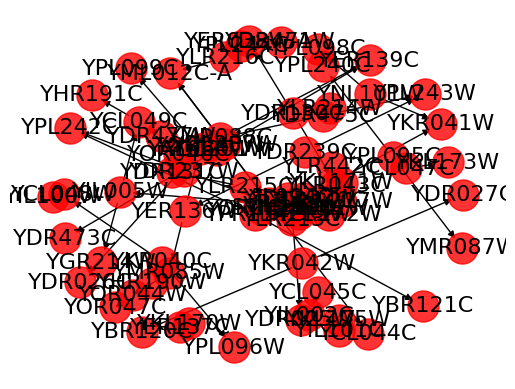

In [32]:
pos=nx.spring_layout(G, scale=100)
plt.axis('off')
nx.draw_networkx_nodes(G,pos,node_color='r',node_size=500,alpha=0.8)
nx.draw_networkx_edges(G,pos,width=1.0,alpha=1)
nx.draw_networkx_labels(G,pos,font_size=16)